## Uncertainty of sample statistics

We would also like to know the uncertainty of our estimates $\overline{x}$ and $s$. 

Note that $s$ is the width estimate of the underlying distribution; it is **NOT** the uncertainty of $\overline{x}$. This is a common misconception.

Rather the uncertainty of $\overline{x}$, $\sigma_{\overline{x}}$ is 

$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$

which we call the **standard error of the mean**. The uncertainty of $s$ itself is

$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

Note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$.

Another useful uncertainty estimate is for computing quantiles. The **standard error of a quantile** is

$$ \sigma_{q_p} = \frac{1}{h_p}\sqrt{\frac{p(1-p)}{N}}$$

where $p$ is between $0$ and $1$.  

***Try this at home***. 
- Generate some data
- Compute $\bar x$ and $s$
- Do it many times
- Estimate the errors
- Compare with the expressions above

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [146]:
# plot options
rc = {'text.usetex': True,
      'font.family': "serif",
      'font.sans-serif': ["Computer Modern"],
      'lines.linewidth': 1,
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

### Example for one distribution generation

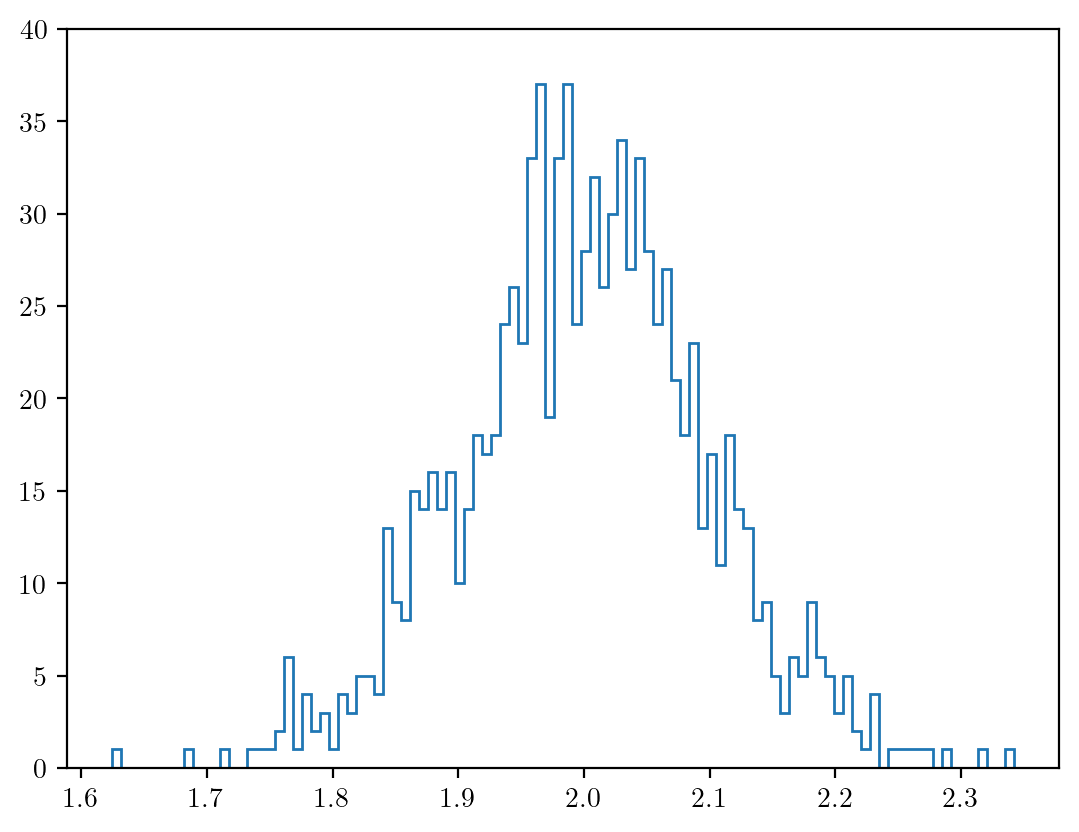

In [86]:
#let's generate some data
N = 1000
x_i = np.random.normal(2,.1,N)
plt.hist(x_i,bins=100,histtype='step');
plt.ylim(0,40);

In [87]:
#population momenta
mu = 2
sigma = .01

In [88]:
#sample momenta
xm = np.mean(x_i)
s2 = np.var(x_i, ddof=1) #this way i divide by (N-1) so i have an unbiased estimator

In [89]:
headers = ['mean', 'variance']
print(f'{headers[0]: <15}{headers[1]}')
print('--------------------------')
print(f'{round(xm,5): <15}{round(s2,5)}')

mean           variance
--------------------------
2.00068        0.00966


To estimate the error and then compare it we need to
generate multiple datas and then compute the stdev of the datas and finaly compare it with the following definitions

In [90]:
err_xm = np.sqrt(s2)/np.sqrt(N)
err_var = np.sqrt(s2)/np.sqrt(2*(N-1))
xm_approx = np.sqrt(2)*sigmamean

### N distributions

In [91]:
def estdev(times):
    # calculating the estimated errors
    x_i = np.random.normal(2,.1,N)
    s2_i = np.var(x_i, ddof=1)
    err_xm = np.sqrt(s2_i)/np.sqrt(N)
    err_var = np.sqrt(s2_i)/np.sqrt(2*(N-1))
    
    xm = np.zeros(times)
    s2 = np.zeros(times)
    
    #stdev for multiple times
    for i in range(times):
        #let's generate some data
        x_i = np.random.normal(2,.1,N)
        xm[i] = np.mean(x_i)
        s2[i] = np.var(x_i, ddof=1)


    # print output
    headers = ['mean_err', 'variance_err']
    print(f'{headers[0]: <15}{headers[1]}')
    print('-------------------------------------------------------')
    print(f'{round(np.std(xm),5): <15}{round(np.std(s2),5)}     stdev from {times} distributions')
    print(f'{round(err_xm,5): <15}{round(err_var,5)}     estimated deviation from one distribution') 
    print()

In [92]:
estdev(int(1e2))
estdev(int(1e3))
estdev(int(1e5))

mean_err       variance_err
-------------------------------------------------------
0.00314        0.00039     stdev from 100 distributions
0.00318        0.00225     estimated deviation from one distribution

mean_err       variance_err
-------------------------------------------------------
0.00316        0.00044     stdev from 1000 distributions
0.00318        0.00225     estimated deviation from one distribution

mean_err       variance_err
-------------------------------------------------------
0.00317        0.00045     stdev from 100000 distributions
0.00322        0.00228     estimated deviation from one distribution



You can see that the estimated errors are pretty good. The mean on multiple distribution is always compatible with the estimator range, for example look at case 2

---

# Exercise

### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate!)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

In [93]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# plot options
rc = {'text.usetex': True,
      'font.family': "serif",
      'font.sans-serif': ["Computer Modern"],
      'lines.linewidth': .5,
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

Our result should be $2\sigma^4$, the integral is the mean of $f(x_i)$ where $x_i$ are samples drawn from half of the gaussian distribution. In order to be efficient and not filtering data sampled from the whole gaussian, we will simply take the modulus of $p(x)$ since the function is even

Here i compute the deviation from the true value as i vary the number of points of the montecarlo integration

In [66]:
def f(x):
    return x**3


n = np.arange(int(1e3), int(1e6) + 1, int(1e3)) #i use arange to have integers
integral = np.empty(len(n)) #montecarlo integral
err = np.empty(len(n)) #deviation from true value
sigma = 10


for i, n_i in tqdm(enumerate(n)):
    x = abs(np.random.normal(0, sigma, n_i)) #using n points
    integral[i] = np.mean(f(x))*(2*np.pi)**0.5*sigma/2
    err[i] = abs(integral[i] - 2*sigma**4)

print(f"{round(integral[-1]) : <10} {2*sigma**4 : <10} {round(err[-1],2)}")


0it [00:00, ?it/s]

20002      20000      1.87


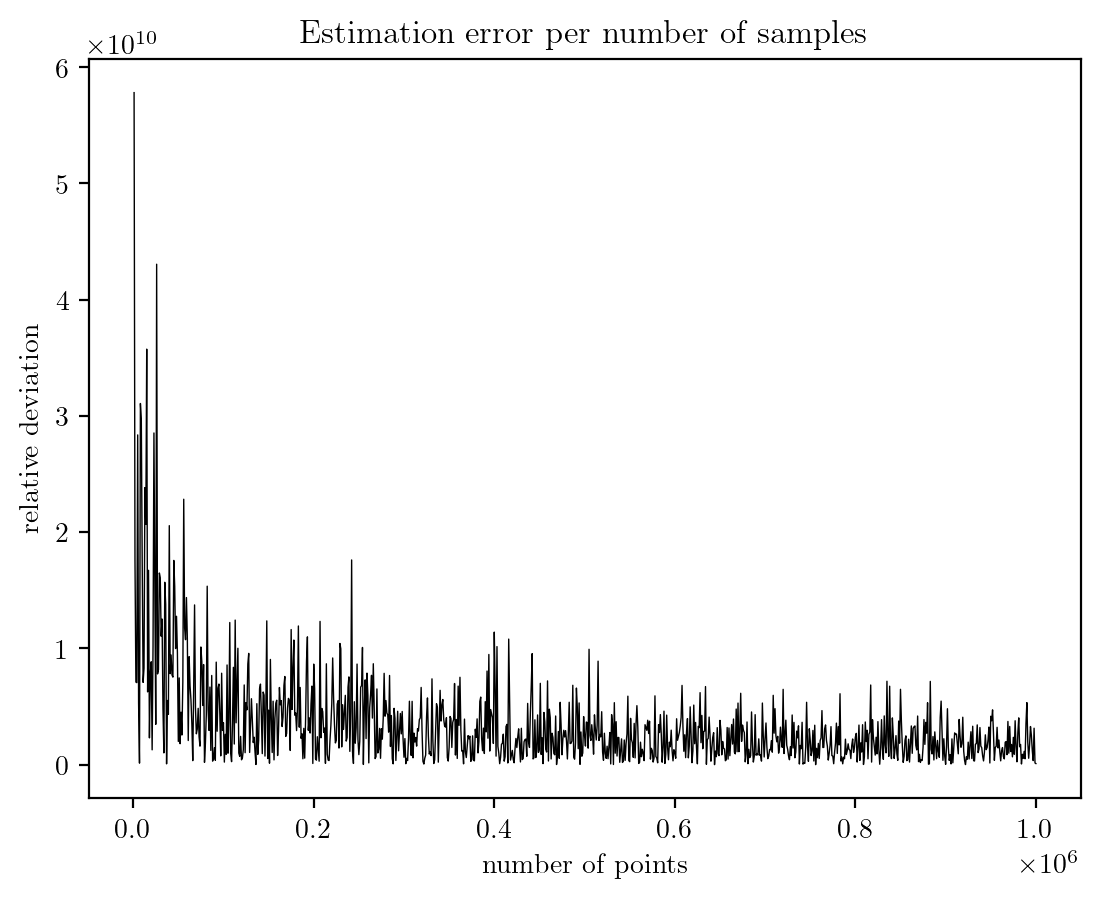

In [149]:
plt.plot(n, err/(2*sigma**4),'-k', lw=.5)
plt.title('Estimation error per number of samples')
plt.xlabel('number of points')
plt.ylabel('relative deviation');

### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)


In [95]:
n_deaths = np.arange(0,5)
groups = [109, 65, 22, 3, 1]

In [110]:
normalization = np.sum(groups)
print(normalization)

200


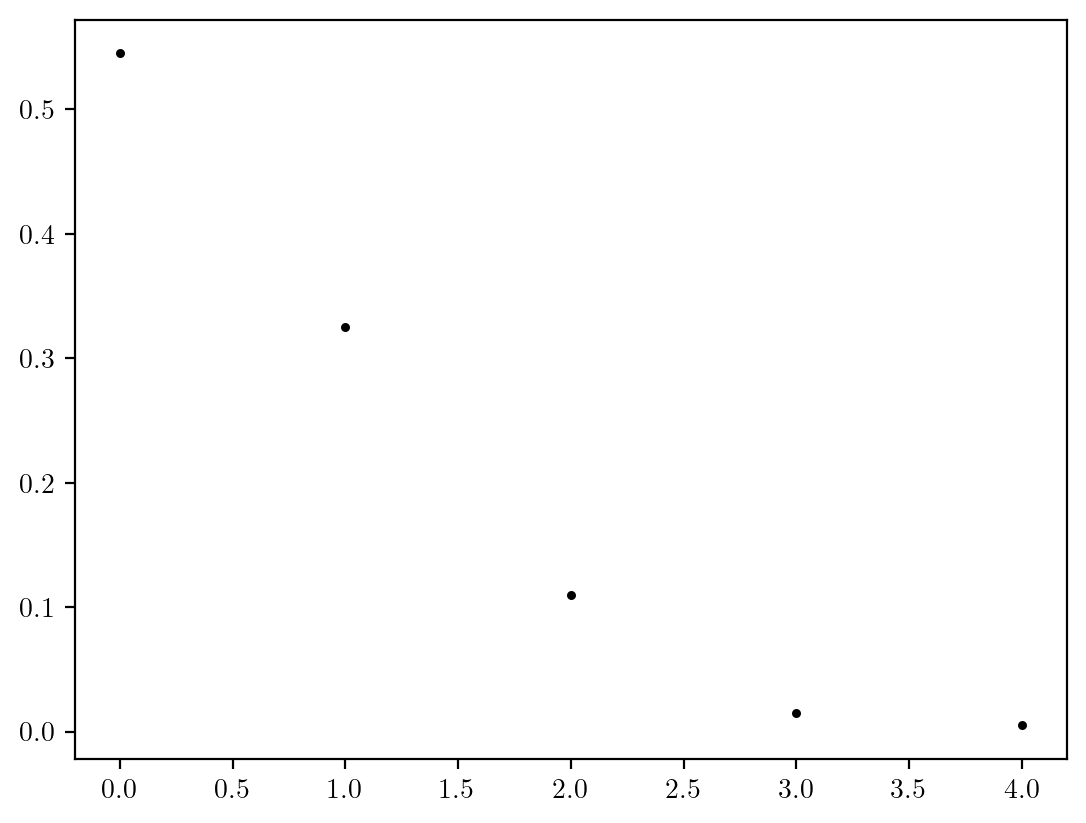

In [112]:
plt.scatter(n_deaths, groups/normalization, s=5, c='k');

this is a poissonian
$$ p(k|\mu) = \frac{\mu^k \exp(-\mu)}{k!} $$


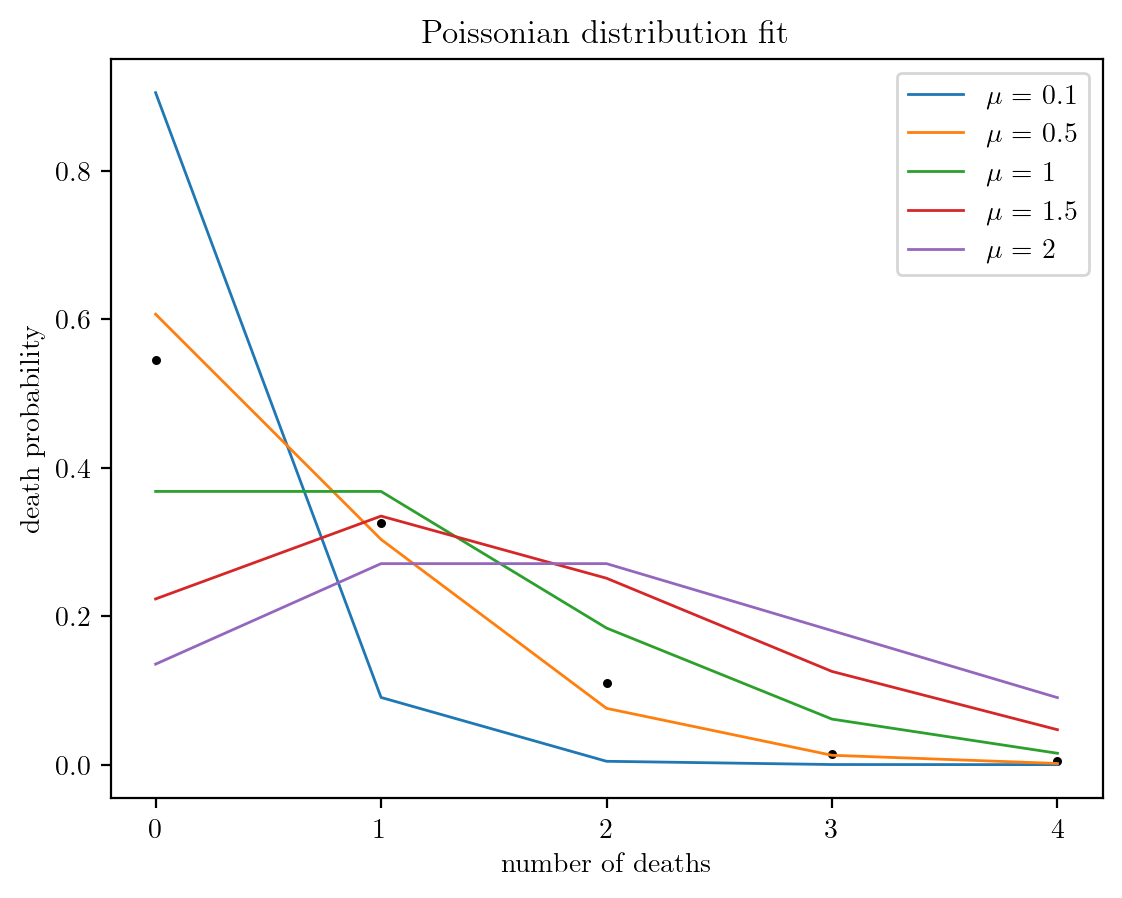

In [159]:
from scipy.stats import poisson
mu = [.1, .5, 1, 1.5, 2]
plt.scatter(n_deaths, groups/normalization, s=5, c='k')

for mu in mu:
    dist = poisson(mu)
    plt.plot(n_deaths, dist.pmf(n_deaths), label = f'$\mu$ = {mu}')
    
plt.title('Poissonian distribution fit')
plt.ylabel('death probability')
plt.xlabel('number of deaths')
plt.xticks(n_deaths)
plt.legend();

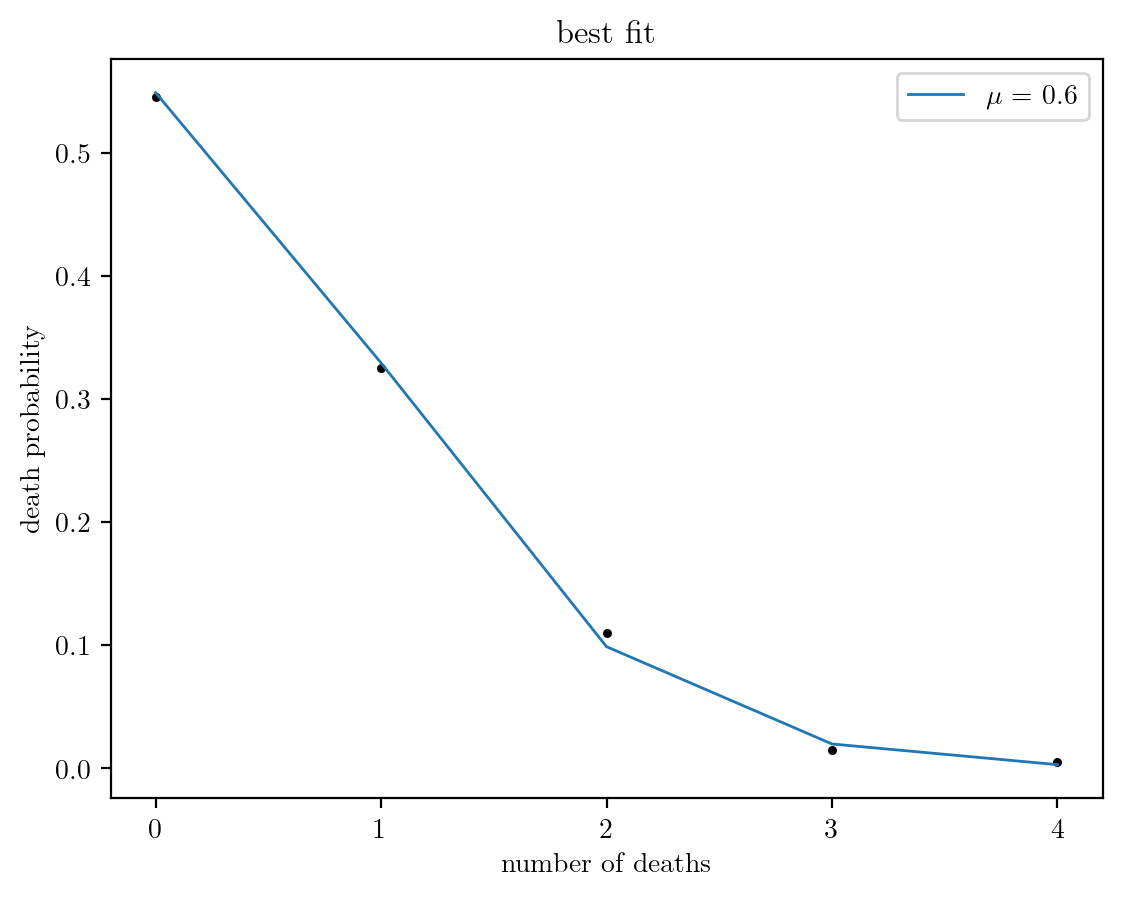

In [166]:
from scipy.stats import poisson
mu = .6
plt.scatter(n_deaths, groups/normalization, s=5, c='k')

dist = poisson(mu)
plt.plot(n_deaths, dist.pmf(n_deaths), label = f'$\mu$ = {mu}')
    
plt.title('best fit')
plt.ylabel('death probability')
plt.xlabel('number of deaths')
plt.xticks(n_deaths)
plt.legend();